In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage
import cv2
import glob
import pandas as pd

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, UpSampling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage import data, io,color
from skimage.io import imread_collection #loads a collection of images
from skimage.io import imread, imshow
from pathlib import Path

from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt

## Debugging pca_rgb done!

In [5]:
def pca_rgb(imgBGR, size): # imgRGB, size
    b,g,r = cv2.split(imgRGB)
    list_channels = [b,g,r]
    
    #check size first
    if size ==1:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 300)
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        rgb_compressed = cv2.merge(inverted_img)    

    elif size == 2:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 400)
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        rgb_compressed = cv2.merge(inverted_img)
    else:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 500)
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        rgb_compressed = cv2.merge(inverted_img)

    return rgb_compressed

In [6]:
img_path = "C:/Study/Semester2/Machine Learning/ML_images/Training/slim1.jpg"

In [7]:
imgRGB = cv2.imread(img_path)

In [8]:
imgRGB.shape

(471, 700, 3)

In [9]:
imgBGR = np.flip(imgRGB, -1)

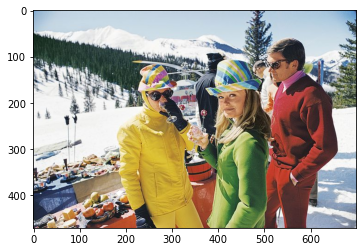

In [10]:
plt.imshow(imgBGR) # flip for reading it 

In [11]:
#Feed BGR to rgb_pca()

In [12]:
SIZE = 1
RGB_compressed = pca_rgb(imgBGR, SIZE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


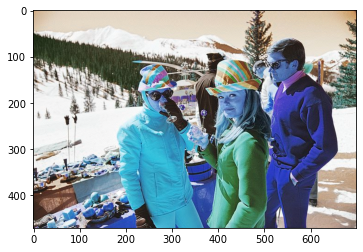

In [13]:
plt.imshow(RGB_compressed)

In [14]:
#flip after compressed for readibility
RGB_compressed = np.flip(RGB_compressed,-1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


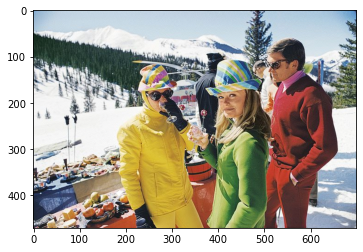

In [15]:
plt.imshow(RGB_compressed)

In [16]:
RGB_compressed.shape

(471, 700, 3)

In [17]:
RGB_compressed = np.float32(RGB_compressed) #RGB_compressed*255
#RGB_compressed = RGB_compressed*255 #

In [18]:
RGB_compressed[0][0]

array([0.47541225, 0.6176374 , 0.7867216 ], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


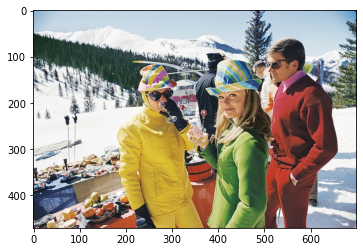

In [19]:
plt.imshow(RGB_compressed) #RGB_compressed.astype('float32')
#plt.imshow(RGB_compressed.astype('int32')) #alternative for eliminate clipping warning // okay it doesn't eliminatte

## Debugging pca_rgb() Test

In [20]:
def pca_rgb(imgBGR, size): #imgRGB, size
    b,g,r = cv2.split(imgBGR)
    list_channels = [b,g,r]
    
    #check size first
    if size ==1:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 300) #100
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        RGB_compressed = cv2.merge(inverted_img)    

    elif size == 2:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 400) #400
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        RGB_compressed = cv2.merge(inverted_img)
    else:
        inverted_img = []
        for c in list_channels:            
            pca = PCA(n_components = 500)
            transformed = pca.fit_transform(c/255) #r_scaled
            inverted = pca.inverse_transform(transformed)
            inverted_img.append(inverted)
        
        tuple(inverted_img)
        RGB_compressed = cv2.merge(inverted_img)
    #RGB_compressed = np.flip(RGB_compressed,-1)
    RGB_compressed = np.float32(RGB_compressed)
    print(RGB_compressed[0][0], RGB_compressed[0][0].dtype, )
    return RGB_compressed

In [21]:
img_path = "C:/Study/Semester2/Machine Learning/ML_images/Training/slim1.jpg"
imgRGB = cv2.imread(img_path)
imgBGR = np.flip(imgRGB, -1)

In [22]:
test_compressed = pca_rgb(imgBGR, 1)
test_compressed = np.clip(test_compressed,0,1) #np.clip make clipping warning disappears

[0.47214258 0.61667776 0.7854621 ] float32


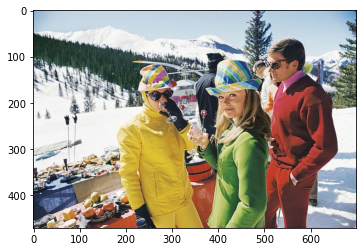

In [23]:
plt.imshow(test_compressed) #Looking good

In [24]:
test_compressed[0][0].dtype

dtype('float32')

### Test LAB separation Done!

In [25]:
imgLAB = cv2.cvtColor(test_compressed, cv2.COLOR_RGB2Lab) 

In [26]:
imgLAB[0][0]

array([ 63.549805,  -1.546875, -26.265625], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


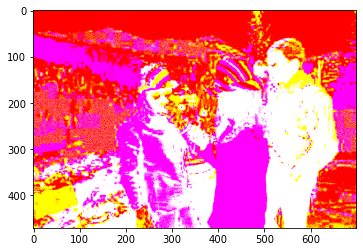

In [27]:
#before scaled
#imgLAB = np.clip(imgLAB, 0, 1) #test with RGB compressed np.clip doesn't anything weird, just clips the .43522676
plt.imshow(imgLAB) #look kinda off

In [28]:
imgLAB[0][0][0]

63.549805

##### Scaled fix thing!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


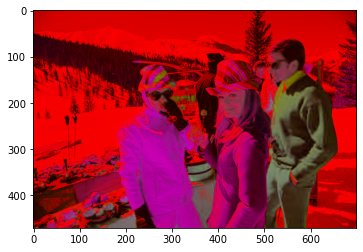

In [29]:
#scaled
imgLAB2 = imgLAB
imgLAB2_amax = np.amax(imgLAB2)
imgLAB2 = imgLAB2/np.amax(imgLAB2)
#imgLAB2 = np.clip(imgLAB2, 0, 1) #test with RGB compressed np.clip doesn't anything weird, just clips the .43522676
plt.imshow(imgLAB2) #loook good! 

In [30]:
imgLAB2[0][0]

array([ 0.63549805, -0.01546875, -0.26265624], dtype=float32)

### Test splitting with split function

In [31]:
L,A,B=cv2.split(imgLAB2)

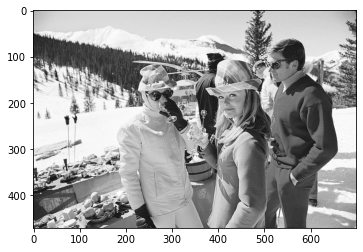

In [95]:
plt.imshow(L, cmap = plt.cm.gray) # For L Channel

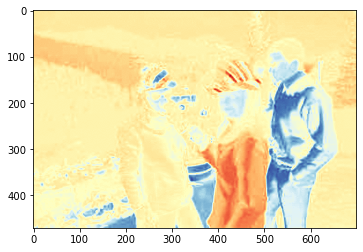

In [105]:
plt.imshow(A, cmap = plt.cm.RdYlBu ) # For A Channel (Here's what You need)

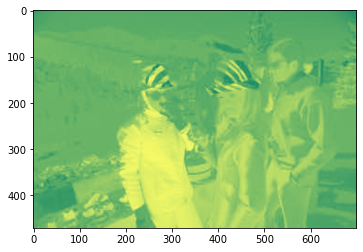

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [116]:
plt.imshow(B, cmap = plt.cm.summer) # For B Channel

### Test splitting with index method

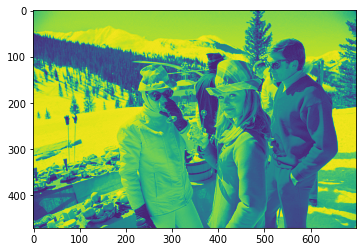

In [35]:
plt.imshow(imgLAB[:,:,0])

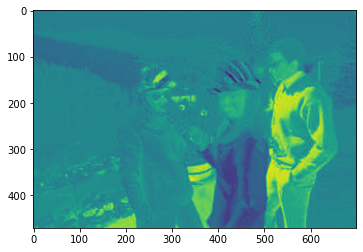

In [36]:
plt.imshow(imgLAB[:,:,1])

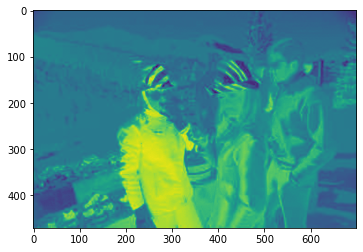

In [37]:
plt.imshow(imgLAB[:,:,2])

#### same result!

## Debug Padding()

In [38]:
def pad(image):
    
    height = image.shape[0]
    width = image.shape[1]

    WHITE = [255,255,255] #[255,255,255]  1, 1, 1
    MAX = 1888
    
    if height % 2 == 0:
        top = int((MAX - height)/ 2)
        bottom = int((MAX - height)/ 2)
    else: 
        top = int((MAX - (height-1))/ 2)
        bottom = int(((MAX - (height-1))/ 2)-1)

    if width % 2 == 0:
        left = int((MAX - width)/ 2)
        right = int((MAX - width)/ 2)
    else: 
        left = int((MAX - (width-1))/ 2)
        right = int(((MAX - (width-1))/2)-1)
    
    image = cv2.copyMakeBorder(image, top, bottom, left, right,
                                cv2.BORDER_CONSTANT,value=WHITE)

    return image

In [39]:
padded_image = pad(imgLAB2)

In [40]:
padded_image.shape

(1888, 1888, 3)

In [41]:
padded_image[1000][1000]

array([ 0.21862793, -0.1765625 ,  0.1171875 ], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


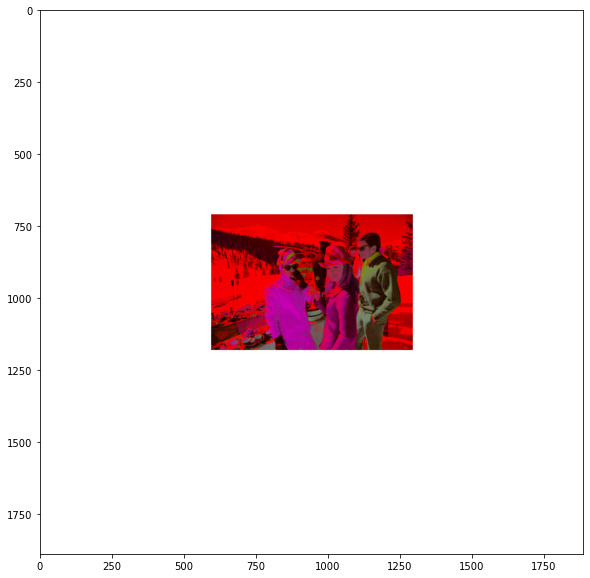

In [42]:
plt.figure(figsize=(10, 10))
plt.imshow(padded_image) # that looks right!!

### Test convert to LAB after padding it works!

In [52]:
#Try convert it to LAB again # incase the padding gives weird format
#padded_LAB = cv2.cvtColor(padded_image, cv2.COLOR_RGB2Lab) 
padded_LAB = cv2.cvtColor(padded_image, cv2.COLOR_RGB2Lab) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


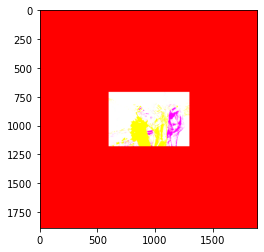

In [53]:
plt.imshow(padded_LAB)

In [54]:
#Somehow this splitting doesn't work
#Y = padded_image[:, :,1:]
#Y = Y / 128 #comment out when show predicted
#Y = Y.tolist()
#L_padded = padded_image[:, :, 0] #.tolist()
#A_padded = padded_image[:, :, 1]
#B_padded = padded_image[:, :, 2]

In [55]:
#scaled_padded = padded_image*imgLAB2_amax

In [56]:
#try spliting with split function // stil Yellow and pit black
L_p,A_p,B_p=cv2.split(padded_LAB)

In [57]:
A_p[1000][1000] #the data is not 0 though. That's some good news

29.328125

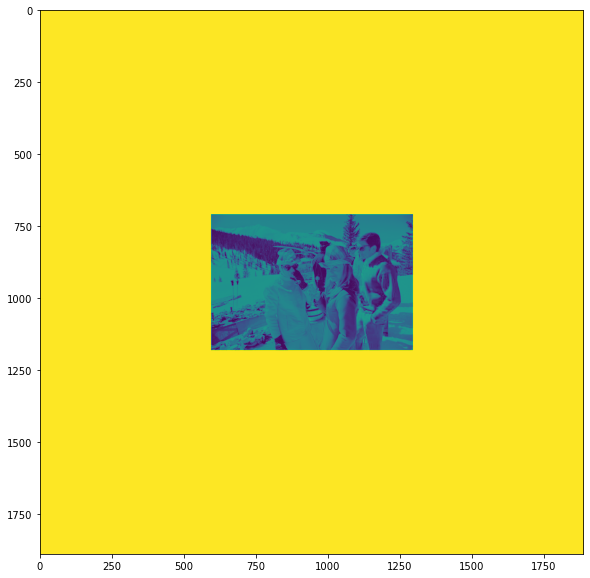

In [59]:
plt.figure(figsize=(10, 10))
plt.imshow(L_p) # scaled back to -127, 128 doesn't change the visual

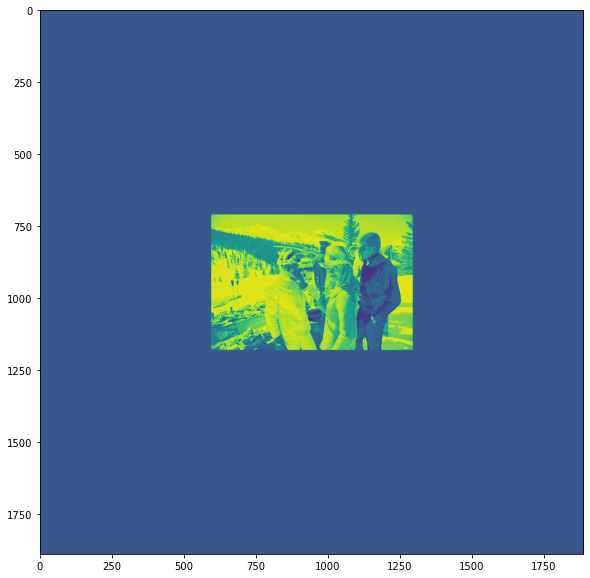

In [60]:
plt.figure(figsize=(10, 10))
plt.imshow(A_p)

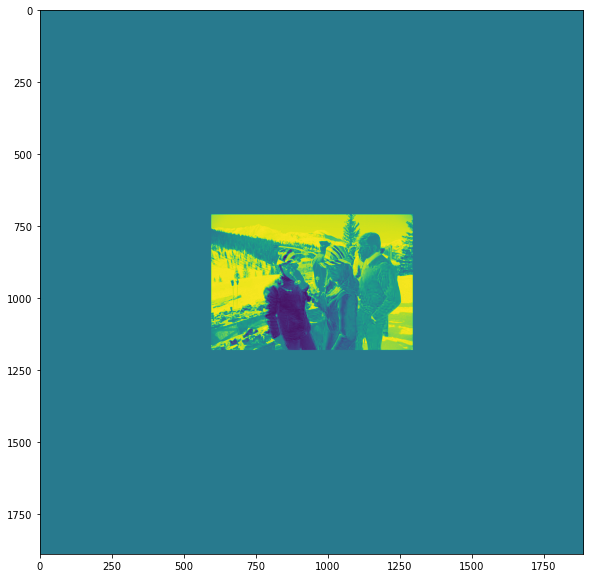

In [61]:
plt.figure(figsize=(10, 10))
plt.imshow(B_p)

#### Gotcha ! # not gotcha

### Test coprmakeborder funtion

In [62]:
padded_image_m = cv2.copyMakeBorder(imgLAB2, 100, 100, 100, 100,
    cv2.BORDER_CONSTANT,value=[255,255,255])

In [63]:
padded_image_m[400][400] # try increasing the size of border

array([0.64923096, 0.03359375, 0.57421875], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


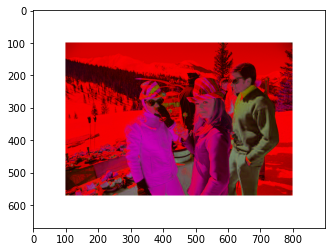

In [64]:
#padded_image  = padded_image /np.amax(padded_image)
plt.imshow(padded_image_m)

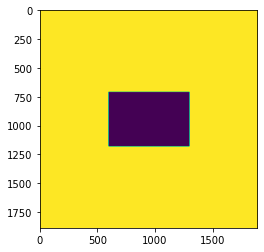

In [67]:
plt.imshow(padded_image[:,:,0])

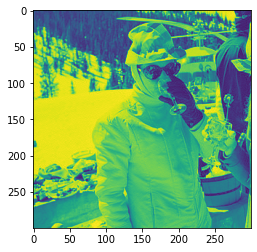

In [68]:
#try show only a slice of the image
plt.imshow(padded_image_m[200:500,200:500,0]) #??

In [69]:
padded_image_m[:,:,0][0][0]

255.0

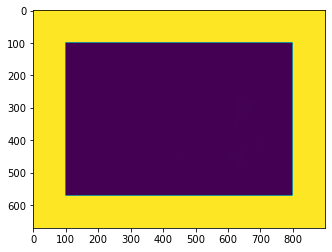

In [72]:
plt.imshow(padded_image_m[:,:,1]) #A channel

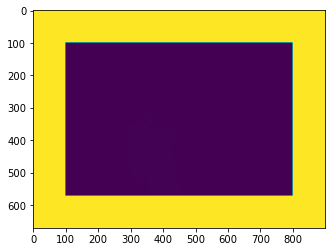

In [73]:
plt.imshow(padded_image_m[:,:,2]) #B channel

### Test Padding()

In [74]:
def pad(image):
    image = image/np.amax(image) #scaled to -1,1 range // float32 type
    height = image.shape[0]
    width = image.shape[1]

    WHITE = [255,255,255] #[255,255,255]  1, 1, 1
    MAX = 1888
    
    if height % 2 == 0:
        top = int((MAX - height)/ 2)
        bottom = int((MAX - height)/ 2)
    else: 
        top = int((MAX - (height-1))/ 2)
        bottom = int(((MAX - (height-1))/ 2)-1)

    if width % 2 == 0:
        left = int((MAX - width)/ 2)
        right = int((MAX - width)/ 2)
    else: 
        left = int((MAX - (width-1))/ 2)
        right = int(((MAX - (width-1))/2)-1)
    
    image = cv2.copyMakeBorder(image, top, bottom, left, right,
                                cv2.BORDER_CONSTANT,value=WHITE)
    
    padded_image = cv2.cvtColor(image, cv2.COLOR_RGB2Lab) 
    
    return padded_image

In [75]:
padded_image_test = pad(imgLAB2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


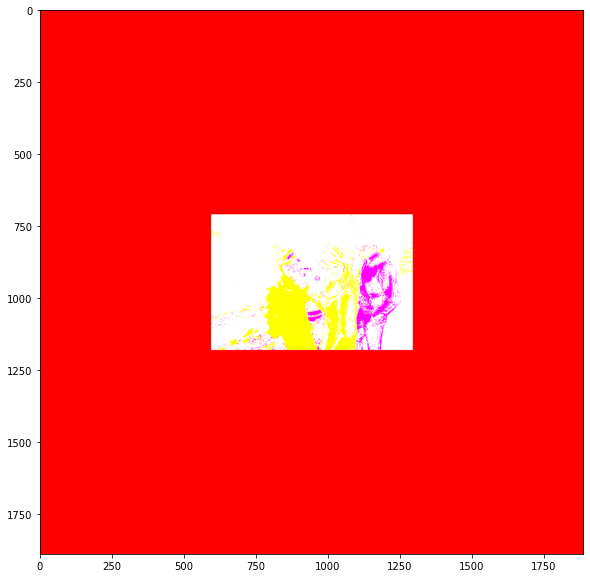

In [76]:
plt.figure(figsize=(10, 10))
plt.imshow(padded_image_test)

### New problem even though It doesn't give out Yellow black anymore It reads color wrong

### Try pad before convert to LAB

In [77]:
def rgb_pad(image):
    
    height = image.shape[0]
    width = image.shape[1]

    WHITE = [255,255,255] #[255,255,255]  1, 1, 1
    MAX = 1888
    
    if height % 2 == 0:
        top = int((MAX - height)/ 2)
        bottom = int((MAX - height)/ 2)
    else: 
        top = int((MAX - (height-1))/ 2)
        bottom = int(((MAX - (height-1))/ 2)-1)

    if width % 2 == 0:
        left = int((MAX - width)/ 2)
        right = int((MAX - width)/ 2)
    else: 
        left = int((MAX - (width-1))/ 2)
        right = int(((MAX - (width-1))/2)-1)
    
    image = cv2.copyMakeBorder(image, top, bottom, left, right,
    cv2.BORDER_CONSTANT,value=WHITE)

    return image

In [78]:
rgb_padded = rgb_pad(test_compressed)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


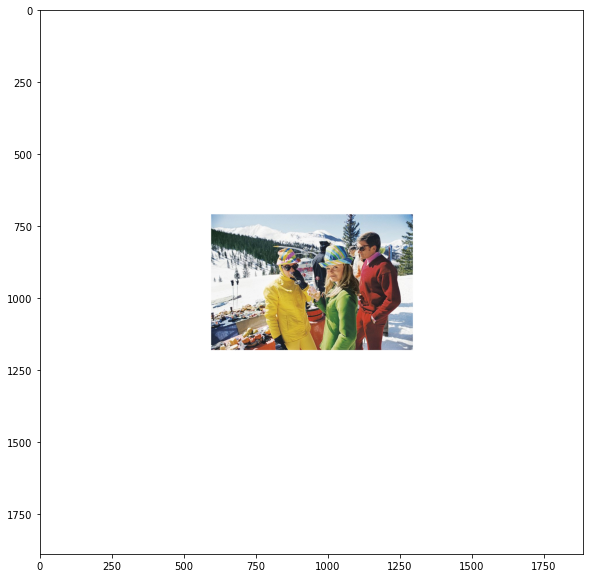

In [79]:
plt.figure(figsize=(10, 10))
plt.imshow(rgb_padded)

In [80]:
padded_LAB = cv2.cvtColor(padded_image, cv2.COLOR_RGB2Lab)

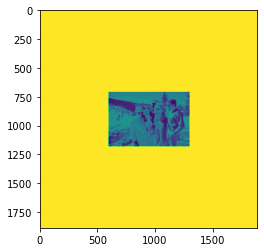

In [81]:
plt.imshow(padded_LAB[:,:,0])

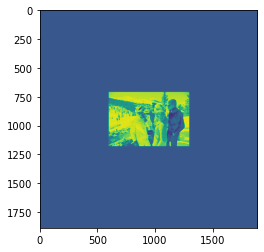

In [82]:
plt.imshow(padded_LAB[:,:,1])

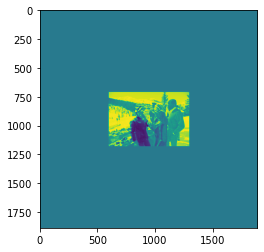

In [83]:
plt.imshow(padded_LAB[:,:,2])

### Copy of pre_img

In [84]:
TOO_SMALL = 200000
SMALL = 500000
MEDIUM = 1200000
LARGE = 2100000

In [85]:
def shape(img):
    size = 0
    resolution = img.shape[0] * img.shape[1]
    if resolution <= TOO_SMALL:
        size = 0
    elif resolution <= SMALL:
        size = 1
    elif resolution <= MEDIUM:
        size = 2
    elif resolution <= LARGE:
        size = 3
    else:
        size = 6
    return size

In [136]:
def prep_img(img_path):
    imgRGB = img_to_array(load_img(img_path)) #cv2.imread(img_path)
    imgRGB = np.array(imgRGB, dtype=float)
    #imgBGR = np.flip(imgRGB, -1)
    
    #check the image category by 'shape' function
    image_size_category = shape(imgBGR) #imgRGB
    #print("image size determined!")

    if image_size_category <1:
        raise Exception("Your image is too small to be used")
    elif image_size_category >4:
        raise Exception("Your image is too big to be used")

    #print("image PCA started!")
    #image_pca = pca_rgb(imgRGB, image_size_category) 
    RGB_compressed = pca_rgb(imgRGB, image_size_category) #imgBGR, image_size_category
    print('RGB_compressed:', np.min(RGB_compressed), np.max(RGB_compressed))
    plt.figure(figsize=(10, 10))
    plt.imshow(RGB_compressed)
    
    print("image is padded")
    padded_image = rgb_pad(RGB_compressed)
    padded_image[1000][1000]
    plt.figure(figsize=(10, 10))
    plt.imshow(padded_image) # show after rgb compressed after padded
    
    #image_pca = np.float32((1.0/255)*image_pca) # #The rgb_compressed come out in RGB scaled data already
    print("image converted to LAB")
    padded_LAB = cv2.cvtColor(padded_image, cv2.COLOR_RGB2Lab) #convert padded RGB compressed to LAB
    padded_LAB = padded_LAB/np.amax(padded_LAB) #scaled to -1/1
    plt.figure(figsize=(10, 10))
    plt.imshow(padded_image, cmap = plt.cm.gray) #show after convert padded rgb compressed to RGB with the function
    #imgLAB = np.clip(imgLAB, 0, 1)

    
    #separate L and AB color channels
    Y = padded_LAB[:, :,1:]
    #Y = Y / 128 #comment out when show predicted
    print('A:', np.min(Y[:,:,0]), np.max(Y[:,:,0]))
    print('B:', np.min(Y[:,:,0]), np.max(Y[:,:,0]))
    
    X = padded_LAB[:, :, 0] 
    print('X:', np.min(X), np.max(X))
    plt.figure(figsize=(10, 10)) # show converted RGB to L channel 
    plt.imshow(X)
    
    #this is in sample code and idk why
    
    X = X.reshape(1, 1888, 1888, 1) #comment out when show predicted
    Y = Y.reshape(1, 1888, 1888, 2) #comment out when show predicted
    
    print("image processed")

    return Y, X 

In [137]:
img_path2 = "C:/Study/Semester2/Machine Learning/ML_images/Training/slim1.jpg"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.47006142 0.614343   0.78271997] float32
RGB_compressed: -0.055676945 1.0616621
image is padded


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image converted to LAB
A: -0.55625 0.6951563
B: -0.55625 0.6951563
X: 0.0 1.0
image processed


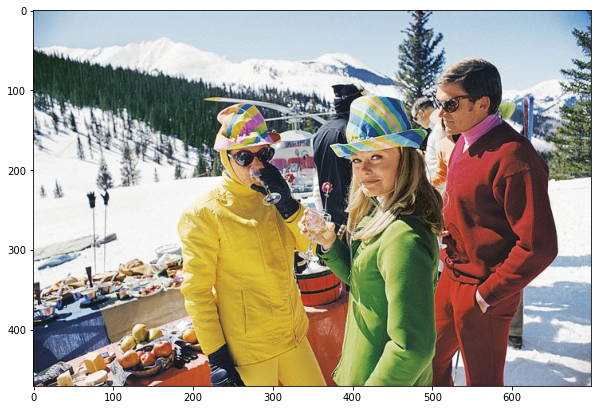

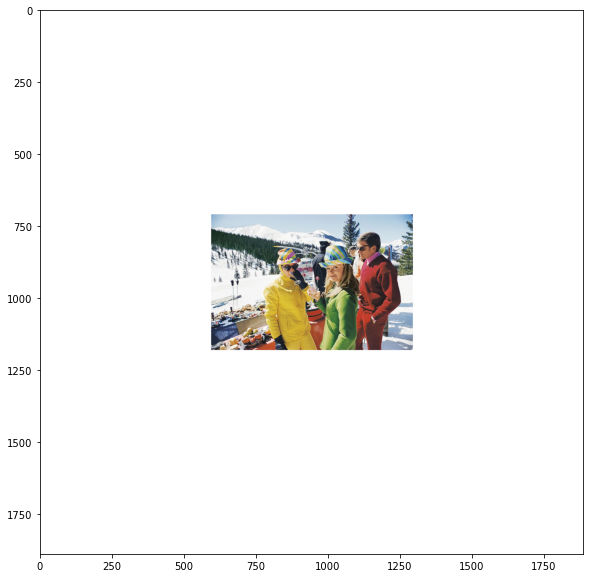

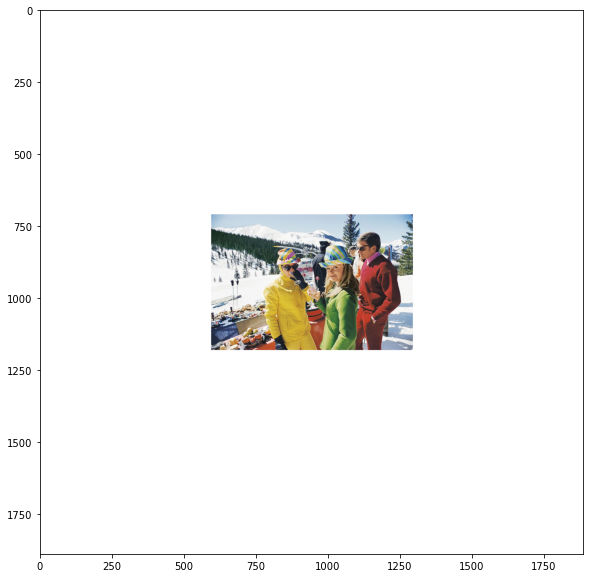

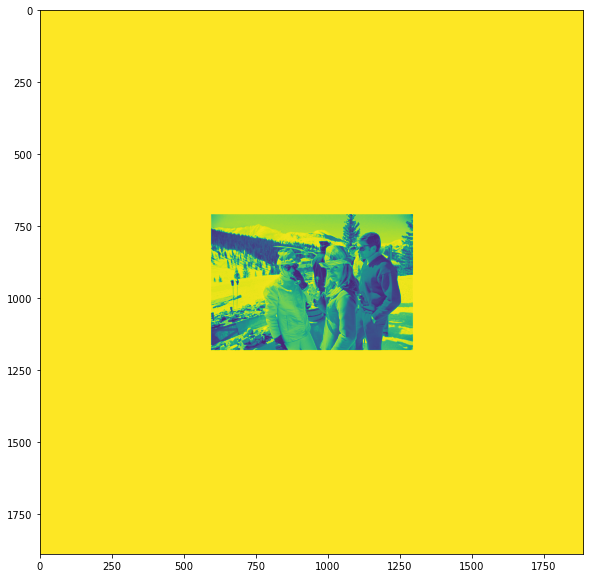

In [138]:
Y_test, X_test = prep_img(img_path2)

#### Spare function from Danielle 

In [ ]:
# The function to preprocess image: by check image category, compress, separate color channels, and pad
# gives out padded images in 2 groups,which are padded Lambda channel (Black&white) and AB channel(colors)

#We can decide to take file path or im collection  or list
#note: we are most familiar with controlling list
n = 1

def prep_img(img_path):
    imgRGB = cv2.imread(img_path)
    imgBGR = np.flip(imgRGB, -1)
    
    #check the image category by 'shape' function
    image_size_category = shape(imgBGR) #imgRGB
    #print("image size determined!")

    if image_size_category <1:
        raise Exception("Your image is too small to be used")
    elif image_size_category >4:
        raise Exception("Your image is too big to be used")

    #print("image PCA started!")
    #image_pca = pca_rgb(imgRGB, image_size_category) 
    RGB_compressed = pca_rgb(imgBGR, image_size_category) #imgRGB, image_size_category
    #RGB_compressed[400][400]
    #plt.figure(figsize=(10, 10))
    #plt.imshow(RGB_compressed)
    
    print("image is padded")
    padded_image = rgb_pad(RGB_compressed)
    #padded_image[1000][1000]
    #plt.figure(figsize=(10, 10))
    #plt.imshow(padded_image)
    
    #image_pca = np.float32((1.0/255)*image_pca) # #The rgb_compressed come out in RGB scaled data already
    print("image converted to LAB")
    padded_LAB = cv2.cvtColor(padded_image, cv2.COLOR_RGB2Lab) #convert padded RGB compressed to LAB
    padded_LAB = padded_LAB/np.amax(padded_LAB) #scaled to -1/1
    #imgLAB = np.clip(imgLAB, 0, 1)

    
    #separate L and AB color channels
    Y = padded_LAB[:, :,1:]
    #Y = Y / 128 #comment out when show predicted
    #Y = Y.tolist()
    X = padded_LAB[:, :, 0] #.tolist()
    #print(X[1000])
    #plt.figure(figsize=(10, 10))
    #plt.imshow(X)
    
    #this is in sample code and idk why
    
    X = X.reshape(1, 1888, 1888, 1) #comment out when show predicted
    Y = Y.reshape(1, 1888, 1888, 2) #comment out when show predicted
    
    print("image processed")

    return Y, X 

In [ ]:
# image padding

def pad(image):
    
    height = image.shape[0]
    width = image.shape[1]

    WHITE = [255,255,255]
    MAX = 1888
    
    if height % 2 == 0:
        top = int((MAX - height)/ 2)
        bottom = int((MAX - height)/ 2)
    else: 
        top = int((MAX - (height-1))/ 2)
        bottom = int(((MAX - (height-1))/ 2)-1)

    if width % 2 == 0:
        left = int((MAX - width)/ 2)
        right = int((MAX - width)/ 2)
    else: 
        left = int((MAX - (width-1))/ 2)
        right = int(((MAX - (width-1))/2)-1)
    
    image = cv2.copyMakeBorder(image, top, bottom, left, right,
    cv2.BORDER_CONSTANT,value=WHITE)

    return image

In [ ]:
# debugging something..
X_train_debug = X_train[0][0,:,:,:]
Y_train_debug = Y_train[0]*128
Y_train_debug = Y_train_debug[0,:,:,:]
debug_merged = np.dstack((X_train_debug, Y_train_debug))
debug_converted = color.lab2rgb(debug_merged)

In [ ]:
plt.imshow(Y_train_debug[:,:,0])

In [ ]:
plt.imshow(debug_converted)